In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,robust_scale,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import xgboost as xb
import lightgbm as lgb
import random
import tensorflow

In [32]:
df =pd.read_csv("loan_approval_dataset.csv")
df[0:10]

,loan_id,dependents,education,self_employed,income,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [33]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(include='number')

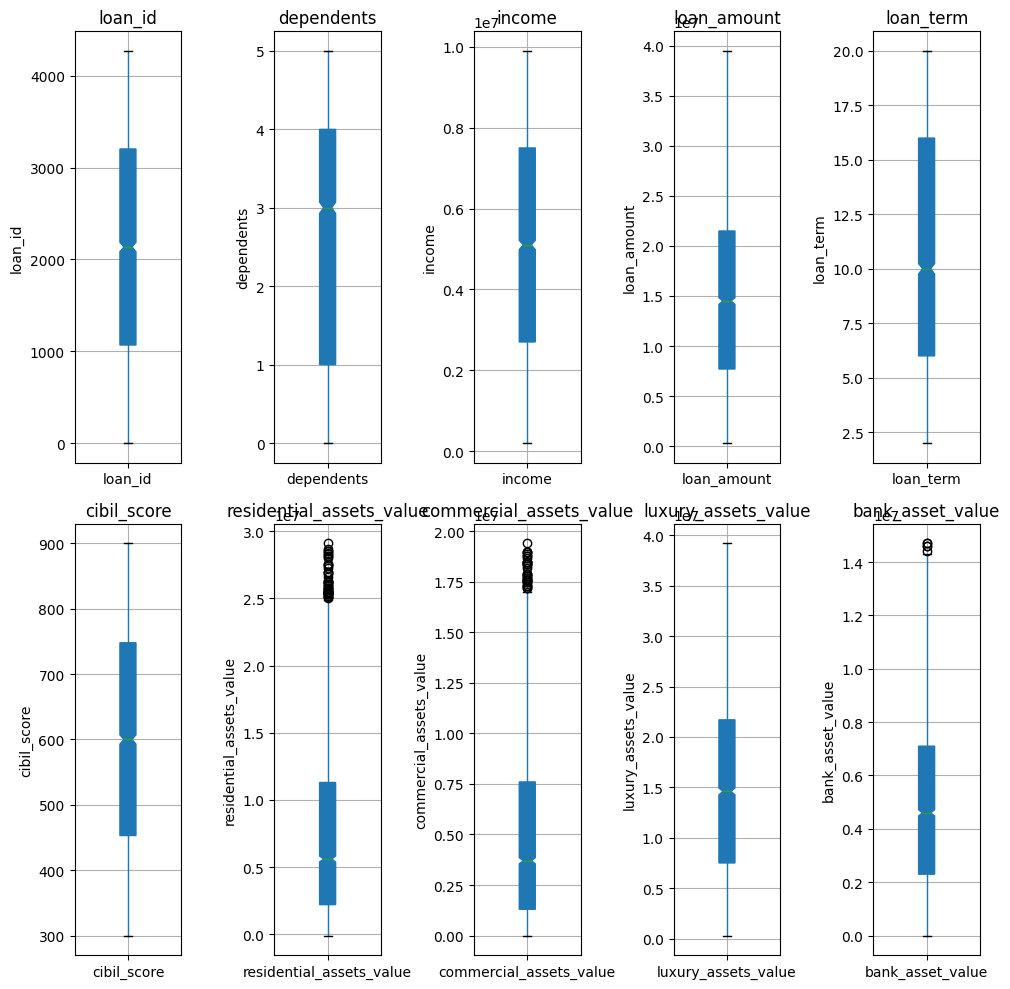

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 10))
axes = axes.flatten()
for i, column in enumerate(df_num.columns):
    df_num.boxplot(column=column, patch_artist=True, notch=True, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel(column)
plt.tight_layout()
plt.show()

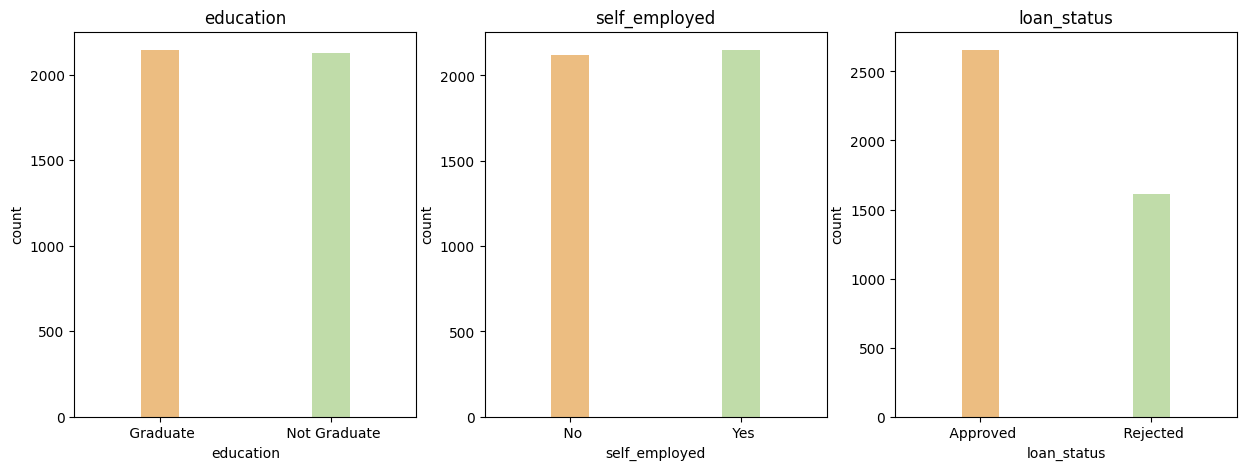

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, column in enumerate(df_cat):
    sns.countplot(x=df[column], palette="Spectral", ax=axes[i], width=.22)
    axes[i].set_title(column)
plt.show()

In [36]:
df.columns

Index(['loan_id', 'dependents', 'education', 'self_employed', 'income',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [37]:
df.head()

,loan_id,dependents,education,self_employed,income,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [38]:
fig =py.sunburst(df, path=['dependents','self_employed'],values='loan_amount', color='loan_amount', title='No of dependents and Self employed as compare to loan amount')
fig.update_layout(title_x=0.5)
fig.show()

In [39]:
encoder = LabelEncoder()
df["loan_status"] = encoder.fit_transform(df["loan_status"])
df["education"] = encoder.fit_transform(df["education"])
df["self_employed"] = encoder.fit_transform(df["self_employed"])
df.head()

,loan_id,dependents,education,self_employed,income,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [40]:
X = df.drop(['loan_status','loan_id'],axis=1)
Y = df['loan_status']

In [41]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state=32, test_size=0.3,stratify=Y)

# Decision Tree

In [42]:
model = DecisionTreeClassifier()
model.fit(train_x,train_y)
y=model.predict(test_x)
mat=classification_report(y,test_y)
print(mat)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       800
           1       0.97      0.98      0.97       481

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



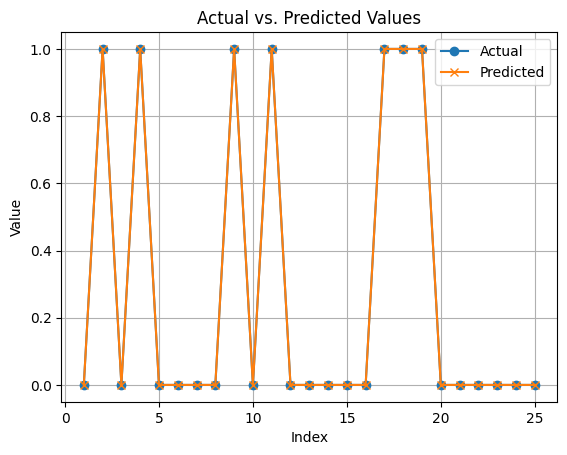

In [43]:
data=df.sample(n=25)
test_data=data.drop(["loan_status","loan_id"],axis=1)
actual = pd.DataFrame(data['loan_status'])
actual = actual.rename(columns={'loan_status':'Actual'})
actual['Predicted'] =model.predict(test_data)
actual
data['Predicted'] = model.predict(test_data)
actual = data['loan_status']
predicted = data['Predicted']
x_values = range(1, len(actual) + 1)
plt.plot(x_values, actual, label='Actual', marker='o')
plt.plot(x_values, predicted, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
model.predict([[0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000]])

C:\Users\Kishan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([1])

In [45]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()